In [24]:
import tensorflow as tf
import seaborn as sns
import pandas as pd
import numpy as np

from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam

In [25]:
wine_quality_white = pd.read_csv("../data/winequality-white.csv", sep=";")
wine_quality_white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [26]:
X = wine_quality_white.drop(['quality'], axis=1).values
y = wine_quality_white['quality'].values
print(X.shape)
print(y.shape)

(4898, 11)
(4898,)


In [27]:
#split in to train and test features and targets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
# standardise data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [29]:
def create_model_regression(learning_rate, dropoute_rate):
    model = Sequential()
    model.add(Dense(100, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dropout(dropoute_rate))
    model.add(Dense(50,activation='relu'))
    model.add(Dropout(dropoute_rate))
    model.add(Dense(25,activation='relu'))
    model.add(Dropout(dropoute_rate))
    model.add(Dense(1))
    
    adam = Adam(lr=learning_rate)
    model.compile(loss="mean_squared_error", optimizer=adam, metrics=['mae'])
    return model

In [30]:
dropoute_rate = 0.1
epochs = 50
batch_size = 1
learning_rate = 0.001

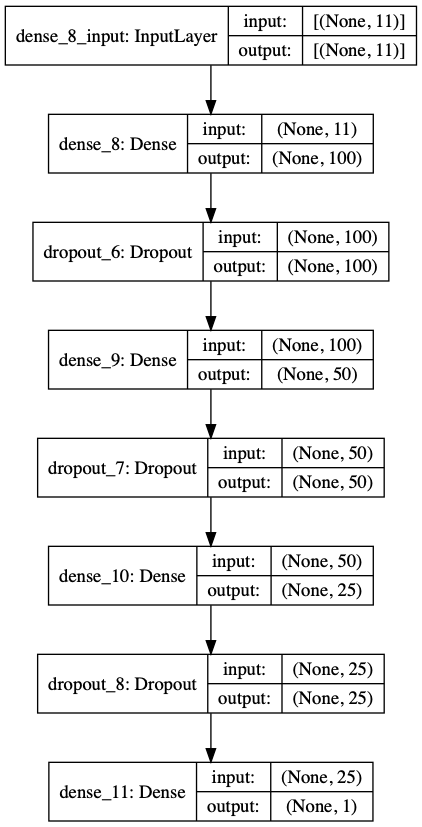

In [31]:
from tensorflow.keras.utils import plot_model
model = create_model_regression(learning_rate, dropoute_rate)
plot_model(model, to_file="../images/model_plot3.png", show_shapes=True, show_layer_names=True)

In [32]:
model_history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2, verbose=1)

Epoch 1/50
3134/3134 [==============================] - 3s 770us/step - loss: 3.9689 - mae: 1.4741 - val_loss: 0.7476 - val_mae: 0.6691
Epoch 2/50
3134/3134 [==============================] - 2s 682us/step - loss: 1.0743 - mae: 0.8082 - val_loss: 0.5937 - val_mae: 0.5830
Epoch 3/50
3134/3134 [==============================] - 2s 702us/step - loss: 0.7794 - mae: 0.6912 - val_loss: 0.5191 - val_mae: 0.5503
Epoch 4/50
3134/3134 [==============================] - 2s 704us/step - loss: 0.7332 - mae: 0.6609 - val_loss: 0.5552 - val_mae: 0.5698
Epoch 5/50
3134/3134 [==============================] - 2s 704us/step - loss: 0.7046 - mae: 0.6656 - val_loss: 0.5283 - val_mae: 0.5626
Epoch 6/50
3134/3134 [==============================] - 2s 707us/step - loss: 0.6621 - mae: 0.6354 - val_loss: 0.5402 - val_mae: 0.5721
Epoch 7/50
3134/3134 [==============================] - 2s 720us/step - loss: 0.6771 - mae: 0.6413 - val_loss: 0.5090 - val_mae: 0.5546
Epoch 8/50
3134/3134 [==========================

In [33]:
# Evaluation 
accuracies = model.evaluate(X_test, y_test, verbose=1)
print("test score", accuracies[0])
print("test MAE", accuracies[1])

31/31 [==============================] - 0s 1ms/step - loss: 0.4491 - mae: 0.5196
test score 0.449117511510849
test MAE 0.5195760130882263


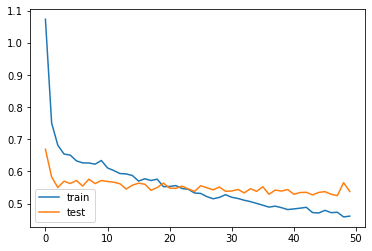

In [34]:
import matplotlib.pyplot as plt 
plt.plot(model_history.history['mae'], label="accuracy")
plt.plot(model_history.history['val_mae'], label="val_accuracy")
plt.legend(['train', 'test'], loc= "lower left")